# 1. What is a neural network?

A neural network is a machine learning program. What it does is try to make decision like the brain would. 

The general steps requied to build a neural network are to have a dataset that is configured to work with a neural network and then train the data. You can tweak parameters to then make the neural network work better with the data you have.

# 2. How do you check the performance?

You can check your performance by splitting your data with training sets, and just like forms of regression, you can look at the accuracy, precision, and recall scores.With this data, you can work on bringing these scores up.

# 3. Data Cleaning

In [1]:
import pandas as pd
import numpy as np

adult_df = pd.read_csv('adult.csv')
adult_df.columns = ['age','workclass','finalweight',
                        'education','education_num',
                        'marital_status','occupation',
                        'relationship','race',
                        'sex','capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'label']
adult_df.columns

adult_df.head()
#klmwlmdl

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
def preprocessing():
    adult_df = pd.read_csv('adult.csv')
    adult_df.columns = ['age','workclass','finalweight',
                        'education','education_num',
                        'marital_status','occupation',
                        'relationship','race',
                        'sex','capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'label']
    
    workclass = pd.get_dummies(adult_df['workclass'])
    adult_df = pd.concat([adult_df, workclass], axis=1)
    adult_df = adult_df.drop(['workclass'], axis=1)
    
    # i can drop education because the df also has education num, which
    # is just education but made into numerical values
    adult_df = adult_df.drop(['education'], axis=1)
    
    marital_status = pd.get_dummies(adult_df['marital_status'])
    adult_df = pd.concat([adult_df, marital_status], axis=1)
    adult_df = adult_df.drop(['marital_status'], axis=1)
    
    occupation = pd.get_dummies(adult_df['occupation'])
    adult_df = pd.concat([adult_df, occupation], axis=1)
    adult_df = adult_df.drop(['occupation'], axis=1)
    
    relationship = pd.get_dummies(adult_df['relationship'])
    adult_df = pd.concat([adult_df, relationship], axis=1)
    adult_df = adult_df.drop(['relationship'], axis=1)
    
    race = pd.get_dummies(adult_df['race'])
    adult_df = pd.concat([adult_df, race], axis=1)
    adult_df = adult_df.drop(['race'], axis=1)
    
    sex = pd.get_dummies(adult_df['sex'])
    adult_df = pd.concat([adult_df, sex], axis=1)
    adult_df = adult_df.drop(['sex'], axis=1)
    
    native_country = pd.get_dummies(adult_df['native_country'])
    adult_df = pd.concat([adult_df, native_country], axis=1)
    adult_df = adult_df.drop(['native_country'], axis=1)
    
    adult_df['label'] = adult_df['label'].map({' <=50K': 0, ' >50K': 1})
    
    # converts dataframe bool columns to int.
    # was having issue with it not taking bools before
    adult_df = adult_df.astype(int)
        
    return adult_df

In [3]:
# adult_df = preprocessing()
adult_df = preprocessing()



In [4]:
pd.set_option('display.max_rows', 90)


In [5]:
adult_df.dtypes

age                 int64
finalweight         int64
education_num       int64
capital_gain        int64
capital_loss        int64
                    ...  
 Thailand           int64
 Trinadad&Tobago    int64
 United-States      int64
 Vietnam            int64
 Yugoslavia         int64
Length: 93, dtype: object

In [6]:
adult_df['label'].value_counts()

label
0    24719
1     7841
Name: count, dtype: int64

# 4. Neural Network

In [7]:
print(adult_df.dtypes.value_counts())

adult_df.head()

int64    93
Name: count, dtype: int64


,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week,label,?,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# adult_df = adult_df.drop(['finalweight'], axis=1)

adult_df

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week,label,?,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# PyTorch

In [9]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = adult_df.drop('label', axis=1).values
y = adult_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyboardInterrupt: 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

tensor([[ 0.3232, -0.7318, -0.4233,  ...,  0.3371, -0.0459, -0.0187],
        [-1.5813,  0.2447, -1.2001,  ...,  0.3371, -0.0459, -0.0187],
        [ 1.3487,  0.6135, -0.4233,  ...,  0.3371, -0.0459, -0.0187],
        ...,
        [ 0.1767, -1.4542,  1.9069,  ...,  0.3371, -0.0459, -0.0187],
        [-0.2628,  0.0980,  1.5185,  ...,  0.3371, -0.0459, -0.0187],
        [ 1.4220, -0.1304, -0.0350,  ...,  0.3371, -0.0459, -0.0187]])


In [ ]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=92,
                 hidden1=64, hidden2=64,
                 out_features=2):
        super().__init__()
        
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(13)

ann = ANN_Model()

In [ ]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [ ]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch Number: {epoch} with loss {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 with loss 0.5767328143119812
Epoch Number: 11 with loss 0.3664855360984802
Epoch Number: 21 with loss 0.3329618275165558
Epoch Number: 31 with loss 0.3147909939289093
Epoch Number: 41 with loss 0.3034750521183014
Epoch Number: 51 with loss 0.2936325669288635
Epoch Number: 61 with loss 0.2862450182437897
Epoch Number: 71 with loss 0.27979856729507446
Epoch Number: 81 with loss 0.27367836236953735
Epoch Number: 91 with loss 0.2675004303455353
Epoch Number: 101 with loss 0.26253488659858704
Epoch Number: 111 with loss 0.25650256872177124
Epoch Number: 121 with loss 0.2514776885509491
Epoch Number: 131 with loss 0.24624206125736237
Epoch Number: 141 with loss 0.24358636140823364
Epoch Number: 151 with loss 0.2386876791715622
Epoch Number: 161 with loss 0.23404401540756226
Epoch Number: 171 with loss 0.2347683608531952
Epoch Number: 181 with loss 0.22830314934253693
Epoch Number: 191 with loss 0.22462597489356995
Epoch Number: 201 with loss 0.2262469083070755
Epoch Number: 2

In [ ]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (9770).

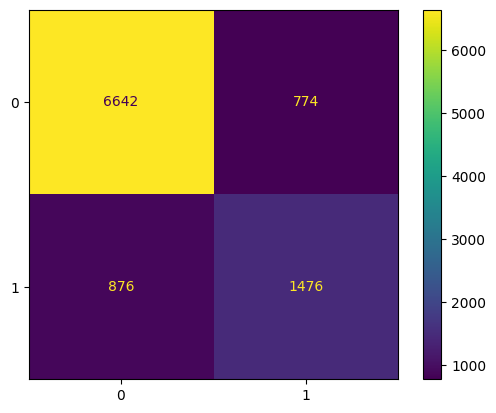

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Keras

In [10]:
import keras
from keras.layers import Input, Dense, concatenate
from keras.models import Model

input1 = Input(shape=(92,))
hidden1 = Dense(64, activation='relu')(input1)
output1 = Dense(2, activation='softmax')(hidden1)

model = Model(inputs=input1, outputs=output1)

loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_fn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
keras_model = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4163
Epoch 2/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 0.3139
Epoch 3/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.3132
Epoch 4/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3073
Epoch 5/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.3011
Epoch 6/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 0.2993
Epoch 7/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 0.3010
Epoch 8/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 0.3002
Epoch 9/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.2955
Epoch 10/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 0.2937
Epoch 11/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 0.2873
Epoch 12/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.2932
Epoch 13/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 0.2924
Epoch 14/100
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - loss: 0.2926
Epoch 15/100
713/71

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


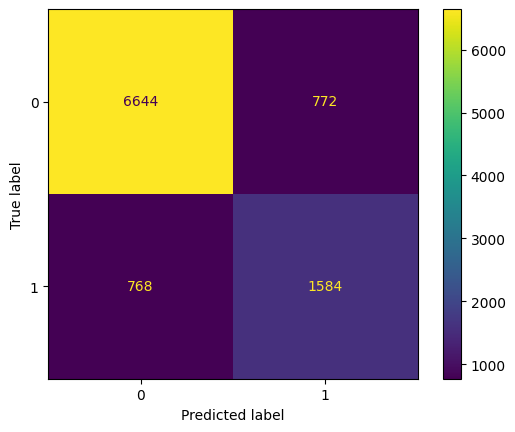

In [ ]:
y_pred = model.predict(X_test)
# i found this online, which, without it, y_pred has a mix of 'continuous-multioutput' and binary
y_pred = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Logistic Regression

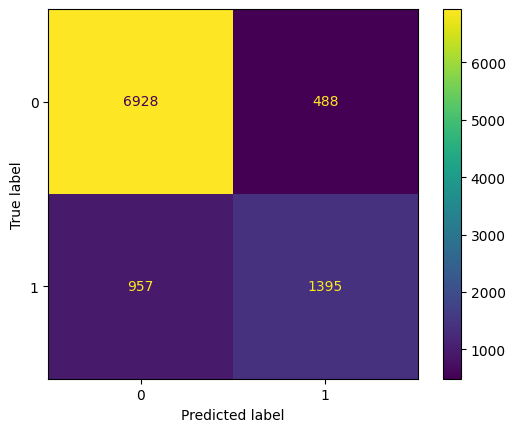

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=13)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
def scores(tn, fp, fn, tp):
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    return f'accuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}'

In [ ]:
# PyTorch Scores
print(scores(6642, 774, 876, 1476))

accuracy: 0.831081081081081
precision: 0.656
recall: 0.6275510204081632


In [ ]:
# Keras Scores
print(scores(6644, 772, 768, 1584))

accuracy: 0.8423423423423423
precision: 0.6723259762308998
recall: 0.673469387755102


In [ ]:
# Logistic Regression
print(scores(6928, 488, 957, 1395))

accuracy: 0.8520679770679771
precision: 0.7408390865639937
recall: 0.5931122448979592


# 5. Comparing PyTorch/Keras to Logistic Regression

When comparing PyTorch and Keras, Keras did very slightly better. I think this could be because of different parameters I used with Keras, like softmax. I used the same optimizer for both of them.

Logistic Regression had a slightly better accuracy than Keras. It also had a solidly better precision score, but the recall was about 8 points worse. I think Logistic Regression might have performed a bit better because it's simpler and in order for Keras to perform better, it needs to be tweaked. It has a lot more parameters that can be changed.